<a href="https://colab.research.google.com/github/KalyanMohanty/projects/blob/main/seed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU

In [8]:
names = os.listdir("/content/drive/MyDrive/archive/")
print("Name of the Fruits and Category \n", names)
# Name of the Fruits and Category 
#  ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']
images = []
x = []
y = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/archive/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/archive/"+folder+"/"+file,target_size=(50,50))
    images.append(img)
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

Name of the Fruits and Category 
 ['Sugar beet', 'Fat Hen', 'Maize', 'Loose Silky bent', 'Small-flowered Cranesbill', 'Common Chickweed', 'Scentless Mayweed', 'ShepherdGCOs Purse', 'Common wheat', 'Charlock', 'Black grass', 'Cleavers']


In [9]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
y = to_categorical(y)
print(y.shape)
x = x/255

(5540, 50, 50, 3)
(5540,)
(5540, 12)


In [44]:
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=5)

callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(50,50,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(64,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(180,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(100,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dense(12,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2)

# model.fit(datagen.flow(xtrain, ytrain, batch_size=64,
#          subset='training'),
#          validation_data=datagen.flow(xtrain, ytrain,
#          batch_size=32, subset='validation'),
#          steps_per_epoch=len(xtrain) / 64, epochs= 50)

his = model.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest), verbose = 1, callbacks=[callback])
#categorical_crossentropy

Epoch 1/50
78/78 [==============================] - 3s 28ms/step - loss: 2.3950 - accuracy: 0.1534 - val_loss: 2.0358 - val_accuracy: 0.2780
Epoch 2/50
78/78 [==============================] - 2s 26ms/step - loss: 1.7914 - accuracy: 0.3592 - val_loss: 1.4836 - val_accuracy: 0.4603
Epoch 3/50
78/78 [==============================] - 2s 26ms/step - loss: 1.4630 - accuracy: 0.4661 - val_loss: 1.2841 - val_accuracy: 0.5325
Epoch 4/50
78/78 [==============================] - 2s 26ms/step - loss: 1.2795 - accuracy: 0.5385 - val_loss: 1.1492 - val_accuracy: 0.5957
Epoch 5/50
78/78 [==============================] - 2s 26ms/step - loss: 1.1164 - accuracy: 0.6111 - val_loss: 1.0113 - val_accuracy: 0.6444
Epoch 6/50
78/78 [==============================] - 2s 26ms/step - loss: 0.9264 - accuracy: 0.6777 - val_loss: 0.8999 - val_accuracy: 0.7022
Epoch 7/50
78/78 [==============================] - 2s 26ms/step - loss: 0.8096 - accuracy: 0.7170 - val_loss: 0.7721 - val_accuracy: 0.7491
Epoch 8/50
78

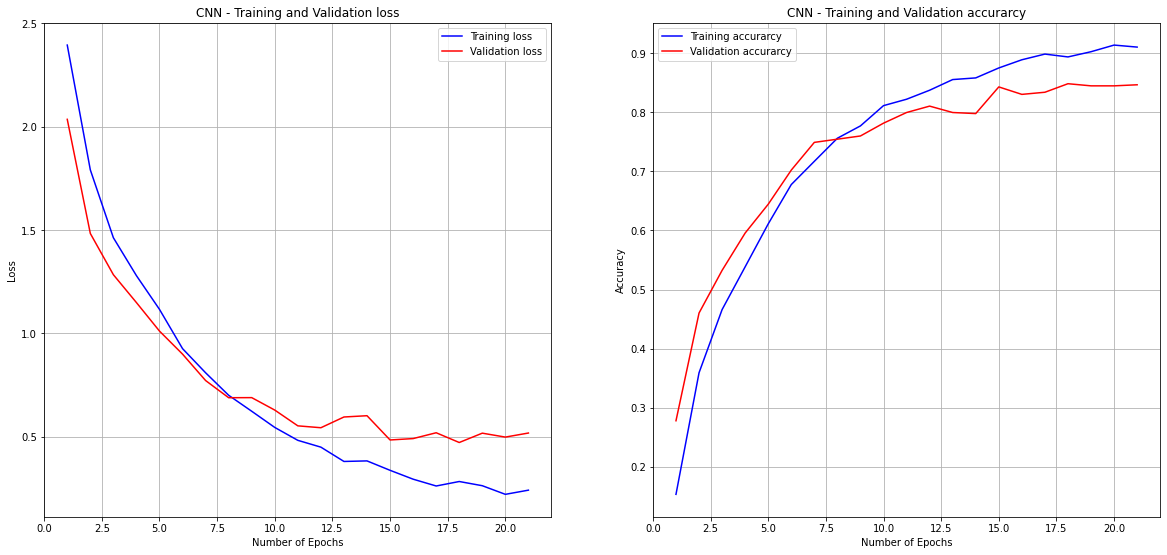

In [47]:
#get the details form the history object
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize = (20, 20))
#Train and validation loss
plt.subplot(2,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig("/content/drive/MyDrive/results/seeding_results/CNN_Loss.png")



#Train and validation accuracy
plt.subplot(2,2,2)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/results/seeding_results/CNN_Accuracy.png")

In [46]:
# from tensorflow.keras.models import plot_model
# model.summary()